In [1]:
from sympy import init_printing; init_printing();
from sympy import symbols, sin, cos, tan, acos, sqrt, Eq, Function, Array
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display all expression in one cell instead of the last one

## Cylindrical Coordinates

Transform Relation from $(r, \theta, \phi)$ to $(x, y, z)$:

\begin{equation}
\left\{\begin{matrix}
x =& R &\sin\phi \\ 
y =& R &\sin\phi \\ 
z =& Z &
\end{matrix}\right.
\end{equation}

Transform Relation from $(x, y, z)$ to $(r, \theta, \phi)$:
\begin{equation}
\left\{\begin{matrix}
 & R^2 =& x^2+y^2 & \\ 
 & Z =& z & \\ 
\tan & \phi  =& y/x & 
\end{matrix}\right.
\end{equation}

Many programming languages have `atan2(y, x)` to avoid the function `atan(y/x)` which is not smart enough.

In [2]:
R = symbols('R', positive=True); Z, phi = symbols('Z phi', real=True)
x, y, z = [f(R, Z, phi) for f in symbols('x, y, z', real=True, cls=Function)]

In [3]:
eq_list = [
    Eq(x, R * cos(phi)),
    Eq(y, R * sin(phi)),
    Eq(z, Z)]
for eq in eq_list: eq
diffed_eq_list = []
for eq in eq_list:
    for var in [R, Z, phi]:
        diffed_eq_list.append(
            Eq(eq.lhs.diff(var),
               eq.rhs.diff(var)))# .subs(x**2+y**2+z**2, r**2).simplify() )

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

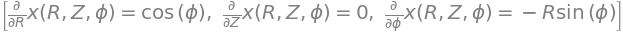

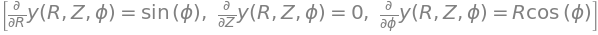

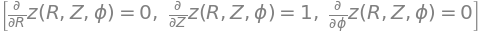

In [4]:
[eq for eq in diffed_eq_list[0:3]]
[eq for eq in diffed_eq_list[3:6]]
[eq for eq in diffed_eq_list[6:9]]

\begin{equation}
\vec{r}_{1} = \frac{\partial \vec{r}}{\partial R} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial R},\quad
\vec{r}_{2} = \frac{\partial \vec{r}}{\partial Z} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial Z},\quad
\vec{r}_{3} = \frac{\partial \vec{r}}{\partial \phi} = \frac{\partial (x\hat{x}+y\hat{y}+z\hat{z})}{\partial \phi}
\end{equation}

In [5]:
r_i = [None, None, None] # The three components would be 
for i, var in enumerate([R, Z, phi]):
    r_i_temp = Array([x.diff(var), y.diff(var), z.diff(var)])
    for eq in diffed_eq_list:
        r_i_temp = r_i_temp.subs(eq.lhs, eq.rhs)
    r_i[i] = r_i_temp; r_i[i]
    

[cos(φ)  sin(φ)  0]

[0  0  1]

[-R⋅sin(φ)  R⋅cos(φ)  0]

In [6]:
from sympy import trigsimp
# define the metric for 3d cylindrical coordinates
metric = [[0 for i in range(3)] for i in range(3)]
for i in range(3):
    for j in range(3):
        metric[i][j] = (lambda vec1, vec2: 
                        vec1[0]*vec2[0] + vec1[1]*vec2[1] + vec1[2]*vec2[2])(r_i[i], r_i[j])
        metric[i][j] = trigsimp(metric[i][j])
        # metric[i][j]
# creating metric object
m_obj = MetricTensor(metric, (R, Z, phi), config='ll'); m_obj.tensor()
g = m_obj.tensor().tomatrix().det(); g

⎡1  0  0 ⎤
⎢        ⎥
⎢0  1  0 ⎥
⎢        ⎥
⎢       2⎥
⎣0  0  R ⎦

In [7]:
ch = ChristoffelSymbols.from_metric(m_obj)
ch.config

'ull'

In [8]:
# Calculating Riemann Tensor from Christoffel Symbols
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

In [9]:
# Calculating Riemann Tensor from Metric Tensor
rm2 = RiemannCurvatureTensor.from_metric(m_obj)
rm2.tensor()

⎡⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎤
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎥
⎢                               ⎥
⎢⎡0  0  0⎤  ⎡0  0  0⎤  ⎡0  0  0⎤⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎢⎢0  0  0⎥  ⎢0  0  0⎥  ⎢0  0  0⎥⎥
⎢⎢       ⎥  ⎢       ⎥  ⎢       ⎥⎥
⎣⎣0  0  0⎦  ⎣0  0  0⎦  ⎣0  0  0⎦⎦

## Construct $\rho$ and $\vec{j}$ Field

In [10]:
from sympy import exp, Matrix, sqrt, trigsimp
from einsteinpy.symbolic.tensor import BaseRelativityTensor
from einsteinpy.symbolic.vector import GenericVector


In [11]:
# define the Levi-Civita tensor for 3d cylindrical coordinates
levi_civita_arr_lll = [[[0 for k in range(3)] for j in range(3)] for i in range(3)]
for i in range(3):
    for j in range(3):
        for k in range(3):
            levi_civita_arr_lll[i][j][k] = Matrix([r_i[i], r_i[j], r_i[k]]).det() / sqrt(g)
            levi_civita_arr_lll[i][j][k] = trigsimp(levi_civita_arr_lll[i][j][k])

In [12]:
levi_civita = BaseRelativityTensor(
    levi_civita_arr_lll,
    (R,Z,phi), config='lll', parent_metric=m_obj)
levi_civita.tensor()

⎡⎡0  0  0 ⎤  ⎡0   0  1⎤  ⎡0  -1  0⎤⎤
⎢⎢        ⎥  ⎢        ⎥  ⎢        ⎥⎥
⎢⎢0  0  -1⎥  ⎢0   0  0⎥  ⎢1  0   0⎥⎥
⎢⎢        ⎥  ⎢        ⎥  ⎢        ⎥⎥
⎣⎣0  1  0 ⎦  ⎣-1  0  0⎦  ⎣0  0   0⎦⎦

In [13]:
density_df = BaseRelativityTensor(
    arr=exp(-R**2),
    syms=(R,Z,phi), config='', parent_metric=m_obj); density_df.arr

sqrt_g_df = BaseRelativityTensor(
    arr=sqrt(g),
    syms=(R,Z,phi), config='', parent_metric=m_obj); sqrt_g_df.arr

nabla_density_df = GenericVector(
    arr=[exp(-R**2).diff(var) for var in [R,Z,phi]],
    syms=(R,Z,phi), config='l', parent_metric=m_obj)
nabla_density_df

B_comp_list = [f(R,Z,phi) for f in symbols("B^1:4", real=True, cls=Function)]
B_df = GenericVector(
    arr=B_comp_list,
    syms=(R,Z,phi), config='u', parent_metric=m_obj)
B_df.tensor()

GenericVector[-2*R*exp(-R**2), 0, 0]

[B¹(R, Z, φ)  B²(R, Z, φ)  B³(R, Z, φ)]

In [14]:
j_df = GenericVector([0, exp(-R**2), exp(-R**2)], (R,Z,phi), config='u', parent_metric=m_obj)
j_df
# j_df = j_df.change_config('l')
j2_df = GenericVector([0,exp(-R**2),0], (R,Z,phi), config='u', parent_metric=m_obj)

GenericVector[0, exp(-R**2), exp(-R**2)]

In [15]:
j_df == j2_df
j_df.tensor() == j2_df.tensor()

False

False

In [16]:
from einsteinpy.symbolic.tensor import tensor_product
tensor_product(density_df, j_df)

BaseRelativityTensor[0, exp(-2*R**2), exp(-2*R**2)]

In [17]:
def tensor_cross(tensor1, tensor2, i=None, j=None):
    from einsteinpy.symbolic.tensor import tensor_product as prod
    middle_tensor = \
        prod( 
            prod(
                prod(levi_civita, sqrt_g_df), 
                tensor1, i=0,j=0
                ), 
            tensor2, i=0,j=0 
            )
#     middle_tensor.change_config('llluu')
    return middle_tensor

In [18]:
# nabla_density == j x B
nabla_density_df.tensor(), nabla_density_df.config
tensor_cross(j_df, B_df).tensor() # j x B
tensor_cross(j_df, B_df).config

([-2*R*exp(-R**2), 0, 0], 'l')

⎡                                 2                    2                   2⎤
⎢                               -R                   -R                  -R ⎥
⎣R⋅(B²(R, Z, φ) - B³(R, Z, φ))⋅ℯ     -R⋅B¹(R, Z, φ)⋅ℯ     R⋅B¹(R, Z, φ)⋅ℯ   ⎦

'l'

In [19]:
ideal_MHD_eq = Eq(
    nabla_density_df.tensor(), 
    tensor_cross(j_df, B_df).tensor())

In [20]:
def divide_Array_Eq(eq):
    from sympy import Eq
    assert(eq.lhs.shape == eq.rhs.shape)
    eq_shape = eq.lhs.shape
    arr_order = len(eq_shape) 
    if arr_order > 1: # Not yet tested for high order tensor
        eq_list = []
        for i in range(eq_shape[0]):
            eq_list.append(
                divide_Array_Eq(Eq(eq.lhs[i], eq.rhs[i]))
            )
        return eq_list
    elif arr_order == 1:
        return [Eq(eq.lhs[i], eq.rhs[i]) for i in range(eq_shape[0])]
    else:# arr_order == 0
        return eq

In [21]:
from sympy import solve, nonlinsolve
B_sol = solve(
    divide_Array_Eq(ideal_MHD_eq), 
    B_df.tensor().tolist())
B_sol

In [22]:
B_comp_list
B_comp_N_list = B_comp_list
for i in range(len(B_comp_N_list)):
    B_comp_N_list[i] = B_comp_N_list[i].subs(B_sol)
    B_comp_N_list[i] = B_comp_N_list[i].subs({B_comp_list[1]: 4, B_comp_list[2]: 6})
B_comp_N_list



B_N_df = GenericVector(
    arr=B_comp_N_list,
    syms=(R,Z,phi), config='u', parent_metric=m_obj)
B_N_df.tensor()

[0  4  6]

In [23]:
from scipy.integrate import ode as scipy_ode
import ray; ray.init()

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
2021-05-18 23:45:12,423	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8266


{'node_ip_address': '114.214.245.114',
 'raylet_ip_address': '114.214.245.114',
 'redis_address': '114.214.245.114:42101',
 'object_store_address': '/tmp/ray/session_2021-05-18_23-45-10_573815_13887/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-05-18_23-45-10_573815_13887/sockets/raylet',
 'webui_url': '127.0.0.1:8266',
 'session_dir': '/tmp/ray/session_2021-05-18_23-45-10_573815_13887',
 'metrics_export_port': 58500,
 'node_id': 'ee9e31adfc53e4323b52d094fda5d84f9aa55490f63e692f60f90b38'}

In [24]:
from scipy.integrate import ode as _scipy_ode

@ray.remote
class FieldTracer(_scipy_ode): # FieldTracer is a kind of ode integrator. 
    def __init__(self, vec_field):
        from sympy.utilities.lambdify import lambdify
        assert(vec_field.config == 'u')
        A__1, A__2, A__3 = vec_field.tensor().tolist()
        A__1 = lambdify(vec_field.syms, A__1)
        A__2 = lambdify(vec_field.syms, A__2)
        A__3 = lambdify(vec_field.syms, A__3)
        def dfdt(t, x):
            du1 = A__1(*x)
            du2 = A__2(*x)
            du3 = A__3(*x)
            return [du1, du2, du3]
        _scipy_ode.__init__(self, dfdt)
        
    def integrate_until(self, t1, dt):
        import numpy as np
        num_of_t = int(t1 / dt); num_of_t
        u_arr = np.empty((num_of_t, 3)); u_arr[0, :] = self._y
        t_arr = np.arange(num_of_t) * dt
        i = 0
        while self.successful() and i < num_of_t-1:
            i += 1
            u_arr[i, :] = self.integrate(self.t+dt)
        return u_arr, t_arr
    
    def set_f_params(self, *args, **kwargs):
        raise DeprecationWarning("The set_f_params method has been removed from the FieldTracer class.")
    
    def set_jac_params(self, *args, **kwargs):
        raise DeprecationWarning("The set_jac_params method has been removed from the FieldTracer class.")
    
tracers = [FieldTracer.remote(B_N_df)for i in range(16)]
[t.set_integrator.remote('vode', method='bdf') for t in tracers]
# B_tracer = FieldTracer(B_N_df).set_integrator('vode', method='bdf')
u0, t0 = (10.0, 0.0, 0.0), 0.0
[t.set_initial_value.remote(u0, t0) for t in tracers]
ray.get([t.integrate_until.remote(10, 0.05) for t in tracers])
# RZphi_arr, t_arr = B_tracer.integrate_until(10, 0.05)




[ObjectRef(24eed4584329c19a5e26fdd807509b4e582112b20100000001000000),
 ObjectRef(e004d35e3a7c2cb255f466730829c4bd4c3e54720100000001000000),
 ObjectRef(cc0320e00aa0584cf3dca2198bb5ea513d136a2b0100000001000000),
 ObjectRef(42867781e3b6e074318e25f6be3feaa096c8da4a0100000001000000),
 ObjectRef(27c0dca5954f99afb5486b52a3d70464397eecec0100000001000000),
 ObjectRef(34c9c2094e42fdbfa78b6eb2b559abfd9c7143a20100000001000000),
 ObjectRef(747754f46b61f47d5beb00592816666c88ae256f0100000001000000),
 ObjectRef(e11fe2800445c79a38d7fb2f207241ce860e40d60100000001000000),
 ObjectRef(139e431dd460af763c929f3d7c2bc655ccb940870100000001000000),
 ObjectRef(bbde8638d39a1245a429bfe56b859a646688ab030100000001000000),
 ObjectRef(44ed5e1383be6308a952da5b28d806b8e56f2cd50100000001000000),
 ObjectRef(d56d800cbde6ca1452d7bc1c68c49e83199de64d0100000001000000),
 ObjectRef(38db0ab51c6b6cfb0c329aaef9f13db7c8ff96390100000001000000),
 ObjectRef(4e2ab276f14c37c27f1cad6513b1220b33a3dab90100000001000000),
 ObjectRef(c96088b12

[ObjectRef(9624f296d48a0a195e26fdd807509b4e582112b20100000001000000),
 ObjectRef(b4bba3bd025ddc5e55f466730829c4bd4c3e54720100000001000000),
 ObjectRef(d5a75db31f99bd73f3dca2198bb5ea513d136a2b0100000001000000),
 ObjectRef(d68fec326c8433c9318e25f6be3feaa096c8da4a0100000001000000),
 ObjectRef(8e088f779f48acd6b5486b52a3d70464397eecec0100000001000000),
 ObjectRef(65a1a3aaa614cba3a78b6eb2b559abfd9c7143a20100000001000000),
 ObjectRef(5497aa04f981e4a15beb00592816666c88ae256f0100000001000000),
 ObjectRef(909a212b104ea2f138d7fb2f207241ce860e40d60100000001000000),
 ObjectRef(6f4f08f3019019213c929f3d7c2bc655ccb940870100000001000000),
 ObjectRef(ff1eb204d30f6c0fa429bfe56b859a646688ab030100000001000000),
 ObjectRef(aa64d94c3d0cf856a952da5b28d806b8e56f2cd50100000001000000),
 ObjectRef(4c37da832ee7bc3152d7bc1c68c49e83199de64d0100000001000000),
 ObjectRef(3f83646dddac6e520c329aaef9f13db7c8ff96390100000001000000),
 ObjectRef(a4b140629d390f707f1cad6513b1220b33a3dab90100000001000000),
 ObjectRef(751371021

[(array([[10. ,  0. ,  0. ],
         [10. ,  0.2,  0.3],
         [10. ,  0.4,  0.6],
         [10. ,  0.6,  0.9],
         [10. ,  0.8,  1.2],
         [10. ,  1. ,  1.5],
         [10. ,  1.2,  1.8],
         [10. ,  1.4,  2.1],
         [10. ,  1.6,  2.4],
         [10. ,  1.8,  2.7],
         [10. ,  2. ,  3. ],
         [10. ,  2.2,  3.3],
         [10. ,  2.4,  3.6],
         [10. ,  2.6,  3.9],
         [10. ,  2.8,  4.2],
         [10. ,  3. ,  4.5],
         [10. ,  3.2,  4.8],
         [10. ,  3.4,  5.1],
         [10. ,  3.6,  5.4],
         [10. ,  3.8,  5.7],
         [10. ,  4. ,  6. ],
         [10. ,  4.2,  6.3],
         [10. ,  4.4,  6.6],
         [10. ,  4.6,  6.9],
         [10. ,  4.8,  7.2],
         [10. ,  5. ,  7.5],
         [10. ,  5.2,  7.8],
         [10. ,  5.4,  8.1],
         [10. ,  5.6,  8.4],
         [10. ,  5.8,  8.7],
         [10. ,  6. ,  9. ],
         [10. ,  6.2,  9.3],
         [10. ,  6.4,  9.6],
         [10. ,  6.6,  9.9],
         [10. 

In [25]:
from sympy.utilities.lambdify import lambdify
B__1, B__2, B__3 = B_N_df.tensor().tolist()
# B__1_arr = lambdify(B_N_df.syms, B__1, modules='numpy')(RZphi_arr[:, 0], RZphi_arr[:, 1], RZphi_arr[:, 2])
# B__2_arr = lambdify(B_N_df.syms, B__2, modules='numpy')(RZphi_arr[:, 0], RZphi_arr[:, 1], RZphi_arr[:, 2])
# B__3_arr = lambdify(B_N_df.syms, B__3, modules='numpy')(RZphi_arr[:, 0], RZphi_arr[:, 1], RZphi_arr[:, 2])
B__1_arr = np.zeros(len(RZphi_arr[:,0]))
B__2_arr = np.ones(len(RZphi_arr[:,0])) * 4
B__3_arr = np.ones(len(RZphi_arr[:,0])) * 6


NameError: name 'np' is not defined

In [ ]:
r_i_arr = [0 for i in range(3)]
for i in range(3):
    r_i_arr[i] = lambdify(B_N_df.syms, r_i[i], modules='numpy')(
        RZphi_arr[:, 0], RZphi_arr[:, 1], RZphi_arr[:, 2])
    r_i_arr[i][2] = np.zeros_like(r_i_arr[i][1])


B_arr = B__1_arr[:, None] * np.stack(r_i_arr[0], axis=-1) + \
        B__2_arr[:, None] * np.stack(r_i_arr[1], axis=-1) + \
        B__3_arr[:, None] * np.stack(r_i_arr[2], axis=-1)


In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Cone(
    x=RZphi_arr[:, 0] * np.cos(RZphi_arr[:, 2]), 
    y=RZphi_arr[:, 0] * np.sin(RZphi_arr[:, 2]), 
    z=RZphi_arr[:, 1],
    u=B_arr[:, 0],
    v=B_arr[:, 1],
    w=B_arr[:, 2],
    colorscale='Blues',
    sizemode="absolute"
#     marker=dict(
#         size=4,
#         color=p_arr,
#         colorscale='Viridis',
#     ),
#     line=dict(
#         color=p_arr,
#         width=2
#     )
))

fig.update_layout(
    scene=dict(
        aspectratio = dict( x=1, y=1, z=1.0 ),
        aspectmode = 'data'))
# fig.show()
